In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <center>Clean the Census data
	The healthcare department wants to process the 2011 census data (Data/census2011.csv) to find some relevant information about their department.

    However, there is a lot of information in the data that is not relevant and can be ignored.

    There are differences in the nomenclature in different datasets so a uniform nomenclature needs to be found as well. New states and Union Territories have been formed at the time of analysis which has to be taken care of so that the data can be used with the data that was captured later. 

    It is also reported that some data is missing in the dataset. However, the values of some of these missing data can be found by using data from other fields. 

    You have been given the responsibility to address these problems and create clean data that can be used later.


In [2]:
census_data=pd.read_csv("Data/census_2011.csv")
census_data.head(5)

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,1048.0,...,94.0,588.0,71.0,101.0,172.0,74.0,10.0,84.0,15.0,1119.0
1,2,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,NaN,...,126.0,562.0,72.0,89.0,161.0,96.0,28.0,124.0,18.0,1066.0
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,488.0,...,46.0,122.0,15.0,22.0,NaN,20.0,NaN,NaN,17.0,242.0
3,4,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,18.0,...,27.0,114.0,12.0,18.0,30.0,19.0,3.0,22.0,7.0,214.0
4,5,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,556.0,...,78.0,346.0,35.0,50.0,85.0,59.0,8.0,67.0,12.0,629.0


Problem Statement 1: (Keep the relevant data)
The census 2011 file contains many fields, which we may not use. Remove some columns so that we are left with only relevant data.
We may need the following columns.

	State name

	District Name

	Population

	Male

	Female

	Literate

	Male Literate

	Female Literate

	Rural Households

	Urban Households

	Households

	Age_Group_0_29

	Age_Group_30_49

	Age_Group_50

	Age not stated.
Import the data to pandas and keep only the required columns. 


In [3]:
census_data=census_data[["State name","District name","Population","Male","Female","Literate","Male_Literate","Female_Literate","Rural_Households","Urban_Households","Households",'Age_Group_0_29',
       'Age_Group_30_49', 'Age_Group_50', 'Age not stated']]



census_data.to_csv('Clean/census_df.csv', index=False)
census_data.head(2)

,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0


Problem Statement 2: (Rename the Column names)
For uniformity in the datasets and taking into consideration the census year, we need to rename some columns. 

	State name  to State/UT

	District name  to District

	Male_Literate to Literate_Male

	Female_Literate to Literate_Female

	Rural_Households  to Households_Rural

	Urban_ Households  to Households_Urban

	Age_Group_0_29 to Young_and_Adult

	Age_Group_30_49 to Middle_Aged

	Age_Group_50 to Senior_Citizen

	Age not stated to Age_Not_Stated


In [4]:
census_data=pd.read_csv("Clean/census_df.csv")

dict = {"State name":"State/UT",
        "District name": 'District',
        "Male_Literate":"Literate_Male",
        "Female_Literate":"Literate_Female",
        "Rural_Households":"Households_Rural",
        "Urban_Households":"Households_Urban",
        'Age_Group_0_29':"Young_and_Adult",
       'Age_Group_30_49':"Middle_Aged", 
        'Age_Group_50':"Senior_Citizen", 
        'Age not stated':"Age_Not_Stated"
       }
 
census_data.rename(columns=dict, inplace=True)
census_data

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,PONDICHERRY,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,PONDICHERRY,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,ANDAMAN AND NICOBAR ISLANDS,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,ANDAMAN AND NICOBAR ISLANDS,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


Problem Statement 3: (Rename State/UT Names)
The State/UT names are in all caps in the census data, For uniformity across datasets we use the names so that only the first character of each word in the name is in upper case and the rest are in lower case. However, if the word is “and” then it should be all lowercase.
Examples: 

	Andaman and Nicobar Islands

	Arunachal Pradesh

	Bihar


In [5]:
def rename_state(state):
    words = state.split()  
    renamed_words = []
    
    for word in words:
        if word.lower() == 'and' or word == '&':
            renamed_words.append(word.lower())  
        else:
            renamed_words.append(word.capitalize())  
    
    return ' '.join(renamed_words)  

census_data['State/UT'] = census_data['State/UT'].apply(rename_state)
census_data['District'] = census_data['District'].apply(rename_state)
census_data['State/UT'] = census_data['State/UT'].replace('Pondicherry', 'Puducherry')
census_data['District'] = census_data['District'].replace('Pondicherry', 'Puducherry')
census_data['State/UT'] = census_data['State/UT'].replace('Nct Of Delhi', 'Delhi')
census_data['District'] = census_data['District'].replace('Nct Of Delhi', 'Delhi')

census_data.to_csv('Clean/census_data_renamed.csv', index=False)
census_data

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Jammu and Kashmir,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Puducherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,Puducherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North and Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


Problem Statement 4: (New State/UT formation)

	In 2014 Telangana was formed after it split from Andhra Pradesh, The districts that were included in Telangana are stored in Data/Telangana.txt . Read the text file and Rename the State/UT From “Andhra Pradesh” to “Telangana” for the given districts.


	In 2019 Laddakh was formed after it split from Jammu and Kashmir, which included the districts Leh and Kargil.  Rename the State/UT From “Jammu and Kashmir” to “Laddakh” for the given districts. 


In [6]:
with open('Data/Telangana.txt', 'r') as file:
    telangana_districts = [line.strip() for line in file]

telangana_rename_dict = {'Andhra Pradesh': 'Telangana'}
districts_to_rename = telangana_districts


census_data.loc[census_data['District'].isin(districts_to_rename), 'State/UT'] = census_data.loc[census_data['District'].isin(districts_to_rename), 'State/UT'].replace(telangana_rename_dict)

ladakh_rename_dict = {'Jammu and Kashmir': 'Ladakh'}
districts_to_rename = ['Kargil(Ladakh)','Leh(Ladakh)']

census_data.loc[census_data['District'].isin(districts_to_rename), 'State/UT'] = census_data.loc[census_data['District'].isin(districts_to_rename), 'State/UT'].replace(ladakh_rename_dict)

census_data.to_csv('Clean/data_modified.csv', index=False)


In [7]:
census_data=pd.read_csv("Clean/data_modified.csv")
census_data
new=census_data[census_data["State/UT"]=="Ladakh"]
new

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated


Problem Statement 5: (Find and process Missing Data)
Find and store the percentage of data missing for each column.
Some data can be found and filled in by using information from other cells. Try to find the correct data by using information from other cells and filling it in. Find and store the percentage of data missing for each column.

Hint:

	Population = Male + Female

	Literate = Literate_Male + Literate_Female

	Population  = Young_and_Adult+  Middle_Aged + Senior_Citizen + Age_Not_Stated

	Households = Households_Rural + Households_Urban 

Create a visualization that compares the amount of missing data before and after the data-filling process was done. 


In [8]:
missing_percentage_before = ((census_data.isnull().sum() / len(census_data)) * 100).round(2)

print("Percentage of Missing Data:")
print(missing_percentage_before)
census_data.isnull().sum()

Percentage of Missing Data:
State/UT            0.00
District            0.00
Population          4.69
Male                4.69
Female              5.16
Literate            5.62
Literate_Male       4.84
Literate_Female     4.22
Households_Rural    6.56
Households_Urban    5.16
Households          5.00
Young_and_Adult     4.84
Middle_Aged         4.69
Senior_Citizen      4.84
Age_Not_Stated      5.47
dtype: float64


State/UT             0
District             0
Population          30
Male                30
Female              33
Literate            36
Literate_Male       31
Literate_Female     27
Households_Rural    42
Households_Urban    33
Households          32
Young_and_Adult     31
Middle_Aged         30
Senior_Citizen      31
Age_Not_Stated      35
dtype: int64

In [9]:
census_data['Population'].fillna(census_data['Male'] + census_data['Female'], inplace=True)
census_data['Literate'].fillna(census_data['Literate_Male'] + census_data['Literate_Female'], inplace=True)
census_data['Households'].fillna(census_data['Households_Rural'] + census_data['Households_Urban'], inplace=True)
census_data['Population'].fillna(census_data['Young_and_Adult'] + census_data['Middle_Aged']+ census_data['Senior_Citizen']+ census_data['Age_Not_Stated'], inplace=True)
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------
census_data['Male'].fillna(census_data['Population'] - census_data['Female'], inplace=True)
census_data['Female'].fillna(census_data['Population'] - census_data['Male'], inplace=True)
census_data['Literate_Male'].fillna(census_data['Literate'] - census_data['Literate_Female'], inplace=True)
census_data['Literate_Female'].fillna(census_data['Literate'] - census_data['Literate_Male'], inplace=True)
census_data['Households_Rural'].fillna(census_data['Households'] - census_data['Households_Urban'], inplace=True)
census_data['Households_Urban'].fillna(census_data['Households'] - census_data['Households_Rural'], inplace=True)

def find_missing_values_indices(x):
    return census_data[x.isna()].index
# Filling missing values for Young_and_Adult
yad_null_ind = find_missing_values_indices(census_data['Young_and_Adult'])
census_data.loc[yad_null_ind, 'Young_and_Adult'] = census_data.loc[yad_null_ind, 'Population'] - (census_data.loc[yad_null_ind, "Middle_Aged"] + census_data.loc[yad_null_ind, 'Senior_Citizen'] + census_data.loc[yad_null_ind, 'Age_Not_Stated'])

# Filling missing values for Middle_Aged
mid_null_ind = find_missing_values_indices(census_data['Middle_Aged'])
census_data.loc[mid_null_ind, 'Middle_Aged'] = census_data.loc[mid_null_ind, 'Population'] - (census_data.loc[mid_null_ind, "Young_and_Adult"] + census_data.loc[mid_null_ind, 'Senior_Citizen'] + census_data.loc[mid_null_ind, 'Age_Not_Stated'])

# Filling missing values for Age_Not_Stated
not_null_ind = find_missing_values_indices(census_data['Age_Not_Stated'])
census_data.loc[not_null_ind, 'Age_Not_Stated'] = census_data.loc[not_null_ind, 'Population'] - (census_data.loc[not_null_ind, "Young_and_Adult"] + census_data.loc[not_null_ind, 'Senior_Citizen'] + census_data.loc[not_null_ind, 'Middle_Aged'])

# Filling missing values for Senior_Citizen
sen_null_ind = find_missing_values_indices(census_data['Senior_Citizen'])
census_data.loc[sen_null_ind, 'Senior_Citizen'] = census_data.loc[sen_null_ind, 'Population'] - (census_data.loc[sen_null_ind, "Young_and_Adult"] + census_data.loc[sen_null_ind, 'Middle_Aged'] + census_data.loc[sen_null_ind, 'Age_Not_Stated'])


Percentage of Missing Data after:
State/UT            0.00
District            0.00
Population          0.16
Male                0.16
Female              0.00
Literate            0.31
Literate_Male       0.31
Literate_Female     0.31
Households_Rural    0.94
Households_Urban    0.47
Households          0.78
Young_and_Adult     0.62
Middle_Aged         0.94
Senior_Citizen      1.25
Age_Not_Stated      0.47
dtype: float64
State/UT            0
District            0
Population          1
Male                1
Female              0
Literate            2
Literate_Male       2
Literate_Female     2
Households_Rural    6
Households_Urban    3
Households          5
Young_and_Adult     4
Middle_Aged         6
Senior_Citizen      8
Age_Not_Stated      3
dtype: int64


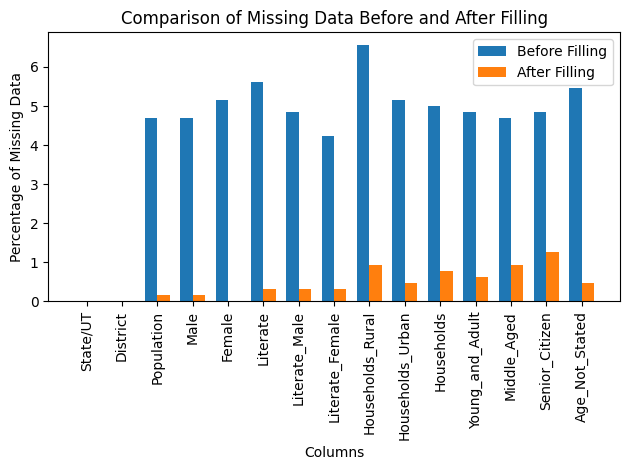

In [10]:

missing_percentage_after = ((census_data.isnull().sum() / len(census_data)) * 100).round(2)

print("Percentage of Missing Data after:")
print(missing_percentage_after)
print(census_data.isnull().sum())
columns = census_data.columns
x = np.arange(len(columns))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, missing_percentage_before, width, label='Before Filling')
rects2 = ax.bar(x + width/2, missing_percentage_after, width, label='After Filling')

ax.set_xlabel('Columns')
ax.set_ylabel('Percentage of Missing Data')
ax.set_title('Comparison of Missing Data Before and After Filling')
ax.set_xticks(x)
ax.set_xticklabels(columns, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


Problem Statement 6: (Save Data)
Save the processed data to a CSV file named “census.csv” in the “Clean_Data” folder.


In [11]:
census_data.to_csv('Clean/census.csv', index=False)
census_data

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Jammu and Kashmir,Kargil,140802.0,77785.0,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Puducherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,12543.0,9428.0,85.0
636,Puducherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,16115.0,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North and Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


### Observations:

In [12]:
high_popu=census_data.groupby("State/UT")["Population"].sum()
high_popu=high_popu.sort_values(ascending= False)
high_popu.head(5)

State/UT
Uttar Pradesh     199812341.0
Maharashtra       112374333.0
Bihar             104099452.0
West Bengal        91276115.0
Madhya Pradesh     72626809.0
Name: Population, dtype: float64

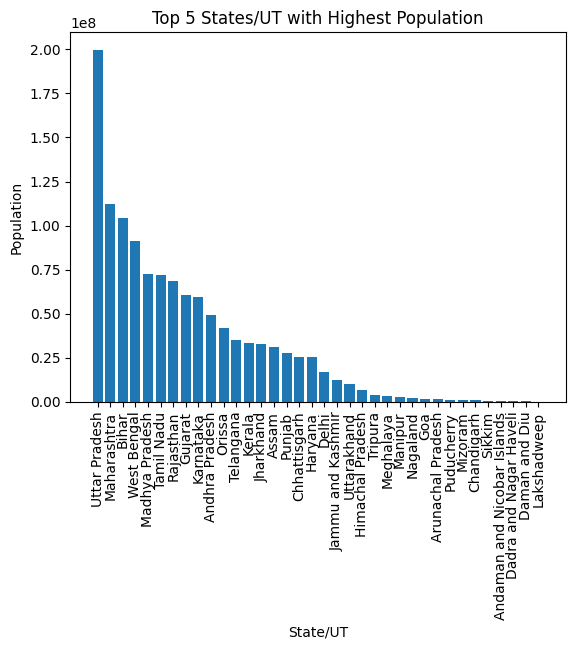

In [13]:
# Extracting the top 5 states/union territories and their populations

states = high_popu.index
population = high_popu.values

# Plotting the bar graph
plt.bar(states, population)

# Adding labels and title
plt.xlabel("State/UT")
plt.ylabel("Population")
plt.title("Top 5 States/UT with Highest Population")

# Rotating the x-axis labels for better visibility (optional)
plt.xticks(rotation=90)

# Displaying the graph
plt.show()

In [14]:
max_literacy=census_data.groupby("State/UT")["Literate"].sum()
literate_per = (max_literacy / census_data.groupby("State/UT")["Population"].sum()) * 100
literate_per=literate_per.sort_values(ascending= False).round(1)


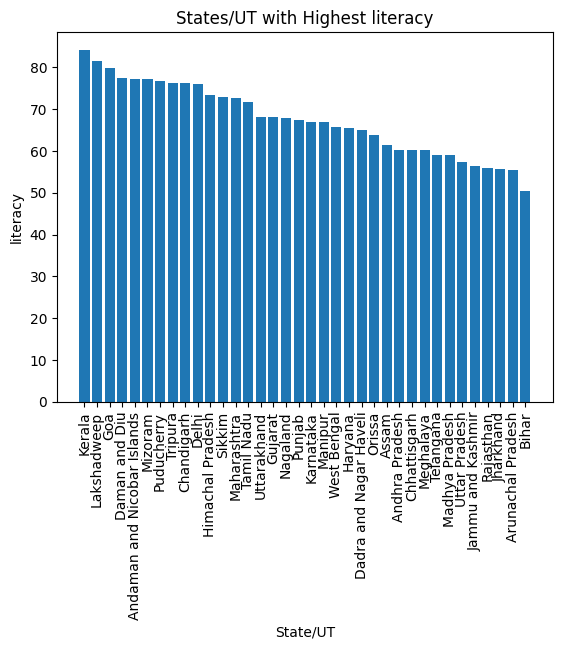

In [15]:
states = literate_per.index
literacy = literate_per.values

# Plotting the bar graph
plt.bar(states, literacy)

# Adding labels and title
plt.xlabel("State/UT")
plt.ylabel("literacy")
plt.title("States/UT with Highest literacy")

# Rotating the x-axis labels for better visibility (optional)
plt.xticks(rotation=90)

# Displaying the graph
plt.show()

### Conclusion:

***Conclusion:
1. Highest populated state 

Uttar Pradesh     199812341.0

2. Highest lirate percentage 

Kerala                84.2


***

## <center>Extract Information from the housing data along with the census data
Siddhu, from Healthcare Department, has reported that the household data that they have (Data/housing.csv), requires some processing in the context of the census data so that more information can be extracted from it. 
Process the housing data and census data to gain some insight.


Problem Statement 7: (Process the relevant data)
From the housing data(Data/housing.csv) read the following columns which may be relevant to the requirement.

	District Name

	Rural/Urban

	Total Number of households

	Total Number of Livable

	Total Number of Dilapidated

	Latrine_premise



In the given data The total number of households, Total Number of Livable, 
Total Number of Dilapidated, Latrine_premise, etc. seem to be in percentage terms and not in absolute terms.

The total number of households in a district can be found in the census data. 

Take the information from the census data and find the absolute values for the Total Number of Dilapidated, and Latrine_premise for both rural and urban areas of each district.


Calculate the data and rename the column names and save it in a CSV file named “housing.csv” in the “Clean_Data” folder, such that it  has the following column names:

	District

	Households_Rural

	Households_Rural_Livable

	Households_Rural_Dilapidated

	Households_Rural_Toilet_Premise

	Households_Urban

	Households_Urban_Livable

	Households_Urban_Dilapidated

	Households_Urban_Toilet_Premise

Report if any district data is in one file but not the other.


In [16]:
housing_data=pd.read_csv("Data/housing.csv")


In [17]:
housing_data=housing_data[["State Name","District Name","Rural/Urban","Total Number of households","Total Number of Livable","Total Number of Dilapidated","Latrine_premise"]]
housing_data = housing_data.rename(columns={
    'State Name':'State',
    'District Name': 'District',
    'Total Number of households': 'Households',
    
})
housing_data.head(10)


,State,District,Rural/Urban,Households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,JAMMU & KASHMIR,Kupwara,Rural,100,58.1,8.3,48.9
1,JAMMU & KASHMIR,Kupwara,Total,100,57.3,7.9,50.9
2,JAMMU & KASHMIR,Kupwara,Urban,100,49.5,4.8,70.2
3,JAMMU & KASHMIR,Badgam,Rural,100,46.3,3.9,83.3
4,JAMMU & KASHMIR,Badgam,Total,100,44.7,3.8,84.3
5,JAMMU & KASHMIR,Badgam,Urban,100,33.8,2.6,90.4
6,JAMMU & KASHMIR,Leh(Ladakh),Rural,100,51.5,2.1,88.1
7,JAMMU & KASHMIR,Leh(Ladakh),Total,100,52.4,1.8,90.4
8,JAMMU & KASHMIR,Leh(Ladakh),Urban,100,54.6,1.1,95.8
9,JAMMU & KASHMIR,Kargil,Rural,100,73.3,3.5,96.8


In [18]:
census_data=pd.read_csv("Clean/census.csv")

housing_data['State'] = housing_data['State'].apply(rename_state)
housing_data['District'] = housing_data['District'].apply(rename_state)
housing_data['State'] = housing_data['State'].replace('&', 'and', regex=True)
housing_data['District'] = housing_data['District'].replace('&', 'and', regex=True)


housing_data.to_csv('Clean/housing.csv', index=False)

housing_data

,State,District,Rural/Urban,Households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Jammu and Kashmir,Kupwara,Rural,100,58.1,8.3,48.9
1,Jammu and Kashmir,Kupwara,Total,100,57.3,7.9,50.9
2,Jammu and Kashmir,Kupwara,Urban,100,49.5,4.8,70.2
3,Jammu and Kashmir,Badgam,Rural,100,46.3,3.9,83.3
4,Jammu and Kashmir,Badgam,Total,100,44.7,3.8,84.3
...,...,...,...,...,...,...,...
1903,Andaman and Nicobar Islands,North and Middle Andaman,Total,100,44.6,2.8,48.3
1904,Andaman and Nicobar Islands,North and Middle Andaman,Urban,100,55.9,6.6,56.1
1905,Andaman and Nicobar Islands,South Andaman,Rural,100,33.5,3.5,64.7
1906,Andaman and Nicobar Islands,South Andaman,Total,100,26.4,2.2,78.3


In [19]:
census_data = pd.read_csv('clean/census.csv')
census_data = census_data[['State/UT','District',"Population" ,"Households",'Households_Rural', 'Households_Urban']]
census_data.rename(columns={"Households":"Households_census"},inplace=True)
census_data.isna().sum()

State/UT             0
District             0
Population           1
Households_census    5
Households_Rural     6
Households_Urban     3
dtype: int64

In [20]:
merged_data = housing_data.merge(census_data,on='District', how='outer')

merged_data['Total Number of Livable'] = (merged_data['Households_census'] * (merged_data['Total Number of Livable'] / 100)).round(0)
merged_data['Total Number of Dilapidated'] = (merged_data['Households_census'] * (merged_data['Total Number of Dilapidated'] / 100)).round(0)
merged_data['Latrine_premise'] = (merged_data['Households_census'] * (merged_data['Latrine_premise'] / 100)).round(0)


# Calculate Households_Urban_Livable
merged_data['Households_Urban_Livable'] = (merged_data['Households_Urban'] * (merged_data['Total Number of Livable'] / 100)).round(0)

# Calculate Households_Urban_Dilapidated
merged_data['Households_Urban_Dilapidated'] = (merged_data['Households_Urban'] * (merged_data['Total Number of Dilapidated'] / 100)).round(0)

# Calculate Households_Urban_Toilet_Premise
merged_data['Households_Urban_Toilet_Premise'] = (merged_data['Households_Urban'] * (merged_data['Latrine_premise'] / 100)).round(0)

# Calculate Households_Rural_Livable
merged_data['Households_Rural_Livable'] = (merged_data['Households_Rural'] * (merged_data['Total Number of Livable'] / 100)).round(0)

# Calculate Households_Rural_Dilapidated
merged_data['Households_Rural_Dilapidated'] = (merged_data['Households_Rural'] * (merged_data['Total Number of Dilapidated'] / 100)).round(0)

# Calculate Households_Rural_Toilet_Premise
merged_data['Households_Rural_Toilet_Premise'] = (merged_data['Households_Rural'] * (merged_data['Latrine_premise'] / 100)).round(0)


merged_data.to_csv('clean/housing.csv', index=False)

merged_data




,State,District,Rural/Urban,Households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise,State/UT,Population,Households_census,Households_Rural,Households_Urban,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise
0,Jammu and Kashmir,Kupwara,Rural,100,105547.0,15078.0,88834.0,Jammu and Kashmir,870354.0,181664.0,158438.0,23226.0,24514346.0,3502016.0,20632585.0,167226556.0,23889282.0,140746813.0
1,Jammu and Kashmir,Kupwara,Total,100,104093.0,14351.0,92467.0,Jammu and Kashmir,870354.0,181664.0,158438.0,23226.0,24176640.0,3333163.0,21476385.0,164922867.0,22737437.0,146502865.0
2,Jammu and Kashmir,Kupwara,Urban,100,89924.0,8720.0,127528.0,Jammu and Kashmir,870354.0,181664.0,158438.0,23226.0,20885748.0,2025307.0,29619653.0,142473787.0,13815794.0,202052813.0
3,Jammu and Kashmir,Badgam,Rural,100,86969.0,7326.0,156470.0,Jammu and Kashmir,753745.0,187839.0,160649.0,27190.0,23646871.0,1991939.0,42544193.0,139714829.0,11769146.0,251367490.0
4,Jammu and Kashmir,Badgam,Total,100,83964.0,7138.0,158348.0,Jammu and Kashmir,753745.0,187839.0,160649.0,27190.0,22829812.0,1940822.0,43054821.0,134887326.0,11467126.0,254384479.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,Andaman and Nicobar Islands,North and Middle Andaman,Total,100,17923.0,1125.0,19409.0,Andaman and Nicobar Islands,105597.0,40185.0,39091.0,1094.0,196078.0,12308.0,212334.0,7006280.0,439774.0,7587172.0
1940,Andaman and Nicobar Islands,North and Middle Andaman,Urban,100,22463.0,2652.0,22544.0,Andaman and Nicobar Islands,105597.0,40185.0,39091.0,1094.0,245745.0,29013.0,246631.0,8781011.0,1036693.0,8812675.0
1941,Andaman and Nicobar Islands,South Andaman,Rural,100,28653.0,2994.0,55339.0,Andaman and Nicobar Islands,238142.0,85532.0,34901.0,50631.0,14507300.0,1515892.0,28018689.0,10000184.0,1044936.0,19313864.0
1942,Andaman and Nicobar Islands,South Andaman,Total,100,22580.0,1882.0,66972.0,Andaman and Nicobar Islands,238142.0,85532.0,34901.0,50631.0,11432480.0,952875.0,33908593.0,7880646.0,656837.0,23373898.0


In [21]:

# Check for districts present in one file but not the other
housing_districts = set(housing_data['District'])
census_districts = set(census_data['District'])

missing_in_housing = census_districts - housing_districts
missing_in_census = housing_districts - census_districts

print("missing_in_census:",missing_in_census)
print("missing_in_housing:",missing_in_housing)

missing_in_census: set()
missing_in_housing: set()


Problem Statement 8: (Visualise the housing data)
Visualize the following data for each state using appropriate methods:

	Number of households for 100 people

	Percentage of households that have toilet(s) in premise to the total 
number of households.

	Urban to rural population ratio.


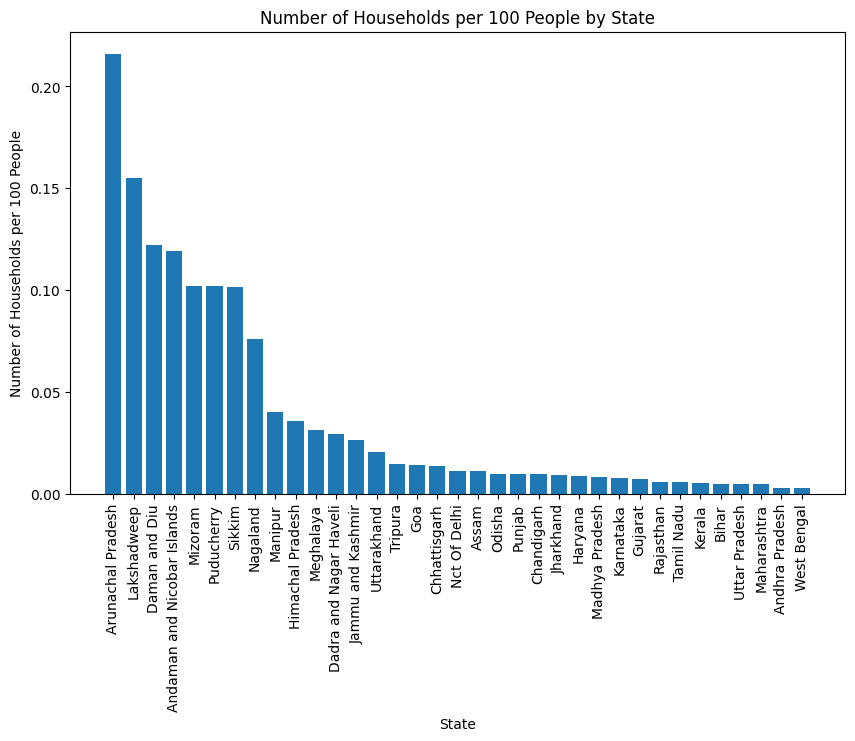

State
Arunachal Pradesh              0.216057
Lakshadweep                    0.155104
Daman and Diu                  0.122172
Andaman and Nicobar Islands    0.119117
Mizoram                        0.102116
Name: Households_Per_100_People, dtype: float64

In [22]:
# Calculate number of households per 100 people per state

merged_data['Households_Per_100_People'] = (merged_data['Households'] / merged_data['Population']) * 100
households_per_100 = merged_data.groupby('State')['Households_Per_100_People'].mean()
households_per_100 = households_per_100.sort_values(ascending=False)

households_per_100

plt.figure(figsize=(10, 6))
plt.bar(households_per_100.index, households_per_100.values)
plt.xlabel('State')
plt.ylabel('Number of Households per 100 People')
plt.title('Number of Households per 100 People by State')
plt.xticks(rotation=90)
plt.show()
households_per_100.head(5)

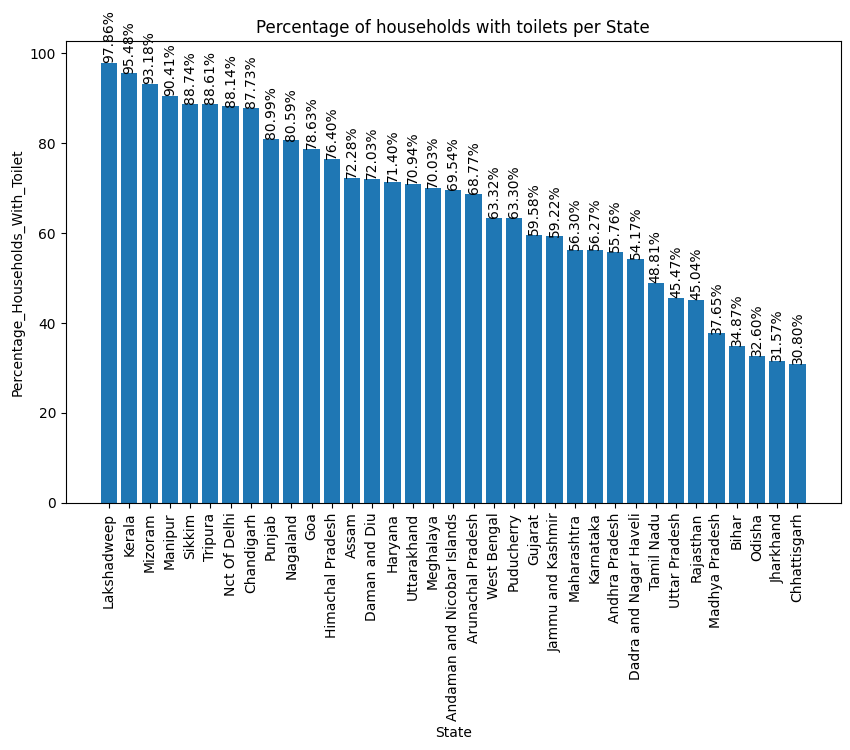

,Households_census,Latrine_premise,Percentage_Households_With_Toilet
State,,,
Lakshadweep,63726.0,62361.0,97.86
Kerala,33653559.0,32134090.0,95.48
Mizoram,808293.0,753132.0,93.18
Manipur,1829892.0,1654486.0,90.41
Sikkim,507066.0,449957.0,88.74


In [23]:
Latrine_premise_state = merged_data.groupby('State')[['Households_census','Latrine_premise']].sum()
Latrine_premise_state['Percentage_Households_With_Toilet'] = ((Latrine_premise_state['Latrine_premise'] / Latrine_premise_state['Households_census']) * 100).round(2)
Latrine_premise_state = Latrine_premise_state.sort_values("Percentage_Households_With_Toilet",ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(Latrine_premise_state.index, Latrine_premise_state['Percentage_Households_With_Toilet'])
plt.xlabel('State')
plt.ylabel('Percentage_Households_With_Toilet')
plt.title('Percentage of households with toilets per State')
plt.xticks(rotation=90)

for i, percentage in enumerate(Latrine_premise_state['Percentage_Households_With_Toilet'].values):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom',rotation=90)

plt.show()

Latrine_premise_state.head(5)


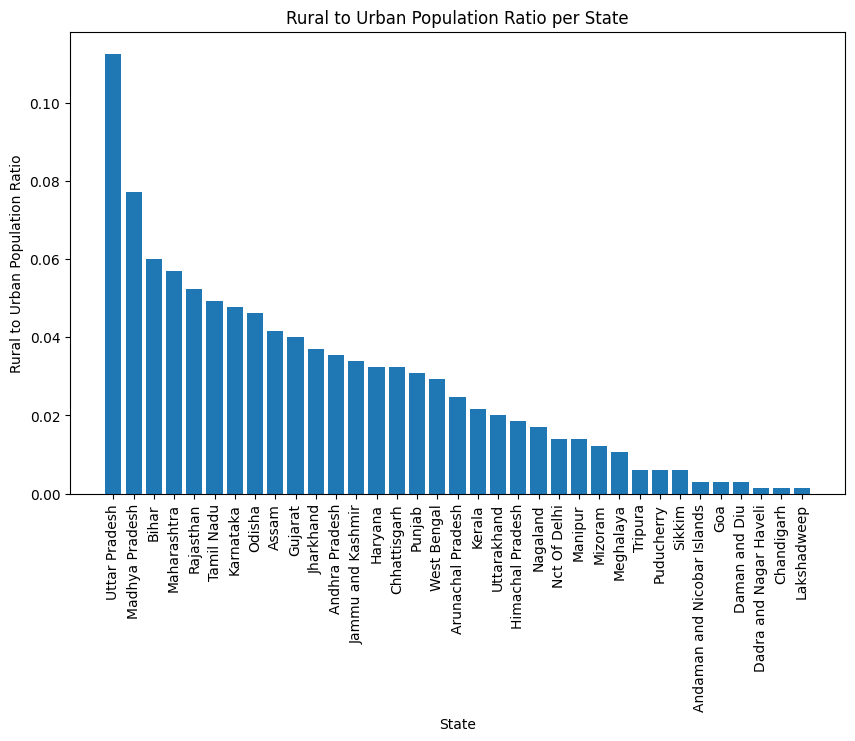

                              Population  Rural/Urban  Rural_Urban_Ratio
State                                                                   
Uttar Pradesh                603404871.0           73           0.112481
Madhya Pradesh               217880427.0           50           0.077042
Bihar                        323402202.0           39           0.060092
Maharashtra                  336782797.0           37           0.057011
Rajasthan                    215272734.0           34           0.052388
Tamil Nadu                   211794358.0           32           0.049307
Karnataka                    178510512.0           31           0.047766
Odisha                       125922654.0           30           0.046225
Assam                         93616728.0           27           0.041602
Gujarat                      181319076.0           26           0.040062
Jharkhand                     98964402.0           24           0.036980
Andhra Pradesh               249799008.0           

In [24]:
urban_rural_pop = merged_data.groupby('State').agg({
    'Population': 'sum',
    'Rural/Urban': lambda x: (x == 'Rural').sum(),
    'Rural/Urban': lambda x: (x == 'Urban').sum()
})

urban_rural_pop['Rural_Urban_Ratio'] = urban_rural_pop['Rural/Urban'] / urban_rural_pop['Rural/Urban'].sum()

urban_rural_pop = urban_rural_pop.sort_values(by='Rural_Urban_Ratio', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(urban_rural_pop.index, urban_rural_pop['Rural_Urban_Ratio'])
plt.xlabel('State')
plt.ylabel('Rural to Urban Population Ratio')
plt.title('Rural to Urban Population Ratio per State')
plt.xticks(rotation=90)
plt.show()

print(urban_rural_pop)


Problem Statement 9: (Inconsistency in different datasets)
After the updates, the “Households_Rural” and “Households_Urban” data are redundant in both housing and census data. Compare the two data and see if there is a major difference between the values in the two files. A difference of more than 10% can be considered a major difference. Report the names of the districts where a major difference is found in the data.


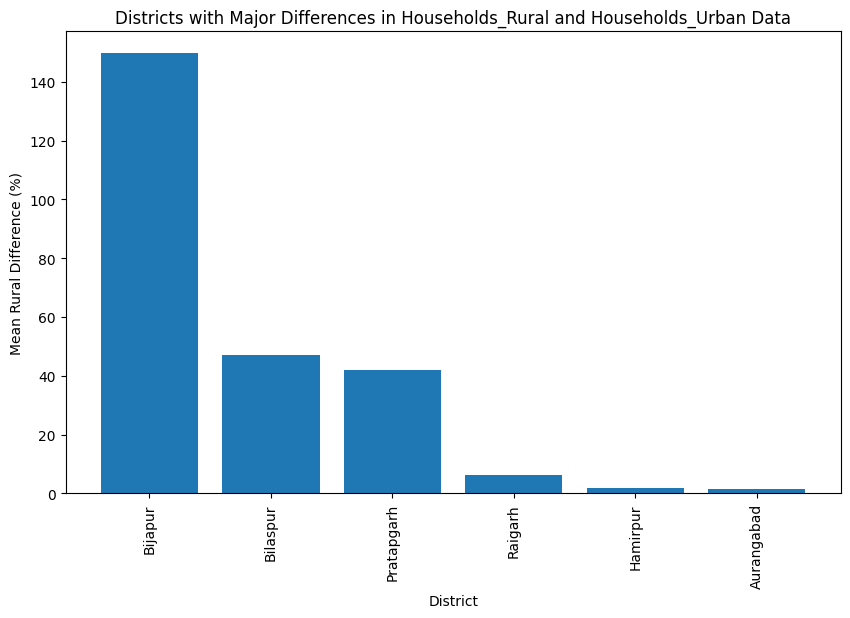

District
Bijapur       149.641591
Bilaspur       47.062978
Pratapgarh     42.104934
Raigarh         6.281707
Hamirpur        1.789968
Aurangabad      1.613422
Name: Rural_Difference, dtype: float64

In [25]:

housing_data = pd.read_csv('Clean/housing.csv')
merged_data = housing_data.merge(census_data[['District', 'Households_Rural', 'Households_Urban']], on='District', how='left')
# Calculate the percentage difference between Households_Rural and Households_Rural in housing and census data
merged_data['Rural_Difference'] = ((merged_data['Households_Rural_x'] - merged_data['Households_Rural_y']) / merged_data['Households_Rural_y']) * 100
merged_data['Urban_Difference'] = ((merged_data['Households_Urban_x'] - merged_data['Households_Urban_y']) / merged_data['Households_Urban_y']) * 100


# Group the data by district and calculate the mean of 'Rural_Difference'
district_mean_difference = merged_data.groupby('District')['Rural_Difference'].mean()
district_mean_difference = district_mean_difference.sort_values(ascending=False)
district_mean_difference=district_mean_difference.head(6)




plt.figure(figsize=(10, 6))
plt.bar(district_mean_difference.index, district_mean_difference)
plt.xlabel('District')
plt.ylabel('Mean Rural Difference (%)')
plt.title('Districts with Major Differences in Households_Rural and Households_Urban Data')
plt.xticks(rotation=90)

plt.show()
district_mean_difference


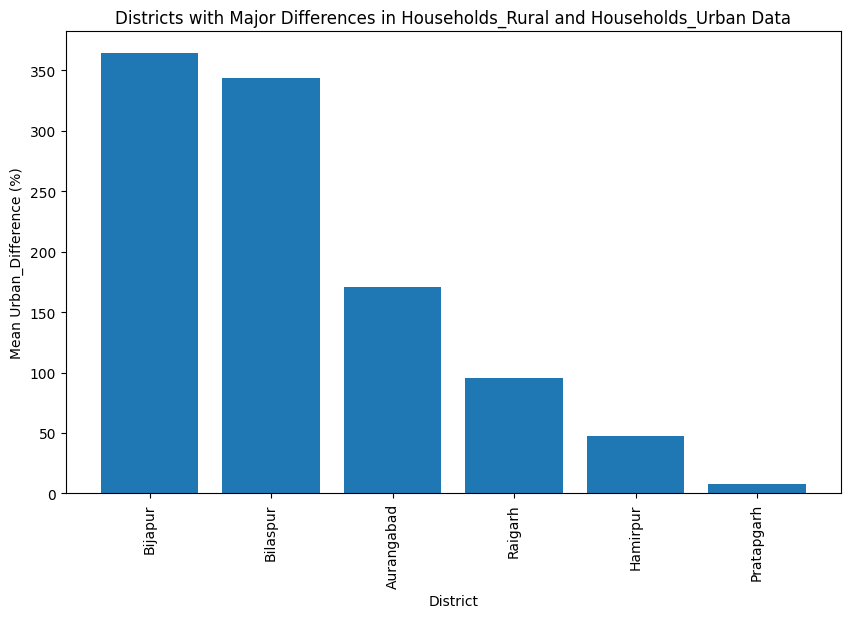

District
Bijapur       364.008879
Bilaspur      344.046868
Aurangabad    170.872349
Raigarh        95.912934
Hamirpur       47.648944
Pratapgarh      7.506476
Name: Urban_Difference, dtype: float64

In [26]:
district_mean_difference = merged_data.groupby('District')['Urban_Difference'].mean()
district_mean_difference = district_mean_difference.sort_values(ascending=False)
district_mean_difference=district_mean_difference.head(6)


plt.figure(figsize=(10, 6))
plt.bar(district_mean_difference.index, district_mean_difference)
plt.xlabel('District')
plt.ylabel('Mean Urban_Difference (%)')
plt.title('Districts with Major Differences in Households_Rural and Households_Urban Data')
plt.xticks(rotation=90)

plt.show()
district_mean_difference

## <center>Clean and gain Insights from the Hospital Data
Aliah, as a representative of the department, is willing to know if any insights can be gained from the Hospital data (Data/hospitals.csv). Apart from general information she wants to know which states need more hospital beds at the earliest.
Assist Aliah to gain insights from the data after cleaning it. 


In [27]:
hospital_data=pd.read_csv("Data/hospitals.csv")
hospital_data


,Unnamed: 0,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796
5,Chandigarh,40,2,1,4,47,3756
6,Chhattisgarh,813,166,12,32,1023,14354
7,Dadra & Nagar Haveli,9,2,1,1,13,568
8,Daman & Diu,4,2,NaN,2,8,298
9,Delhi,534,25,9,47,615,20572


Problem Statement 10: (Fix the header)
Import the hospital data from Data/hospitals.csv and make the necessary changes to the header (Do not change the original file).
The header uses acronyms that are defined in metadata.csv. Find the data and rename the headers so that it is more understandable to users who are not familiar with the acronyms. The First cell in the header is missing which should be renamed to State/UT. Rename the other headers in a uniform format. 


In [28]:
metadata=pd.read_csv("Data/metadata.csv")
metadata

,Acronyms
0,"Number of Primary Health Centers(PHCs),"
1,"Community Health Centers(CHCs),"
2,Sub-District/Divisional Hospitals(SDHs)
3,District Hospitals(DHs)


In [29]:
header_mappings = {
    "PHC": "Number of Primary Health Centers",
    "CHC": "Community Health0 Centers",
    "SDH": "Sub-District/Divisional Hospitals",
    "DH": "District Hospitals"
}

hospital_data.rename(columns=header_mappings, inplace=True)

hospital_data.rename(columns={hospital_data.columns[0]: "State/UT"}, inplace=True)
print(hospital_data.columns)
hospital_data
hospital_data.to_csv('clean/hospital.csv', index=False)


Index(['State/UT', 'Number of Primary Health Centers',
       'Community Health0 Centers', 'Sub-District/Divisional Hospitals',
       'District Hospitals', 'Hospitals', 'HospitalBeds'],
      dtype='object')


In [30]:
hospital_data.fillna(0,inplace=True)

Problem Statement 11: (Create a function to alter the data to create uniformity)
The State/UT names have some different formats compared to other census and housing data. Manually identify those differences and fix them so that the State/UT names match exactly with the census and housing data. 
A function should be created to perform this operation. Since the same operation is required for another dataset as well. 
After the process save the data in a CSV file named “all_hospitals.csv” in the “Clean_Data” folder


In [31]:
hospital_data=pd.read_csv("Clean/hospital.csv")
def rename_state(state):
    words = state.split()  
    renamed_words = []
    
    for word in words:
        if word.lower() == 'and' or word == '&':
            renamed_words.append(word.lower())  
        else:
            renamed_words.append(word.capitalize())  
    
    return ' '.join(renamed_words)  


hospital_data['State/UT'] = hospital_data['State/UT'].apply(rename_state)
hospital_data['State/UT'] = hospital_data['State/UT'].replace('&', 'and', regex=True)

hospital_data.to_csv('Clean/hospital.csv', index=False)
hospital_data

,State/UT,Number of Primary Health Centers,Community Health0 Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796
5,Chandigarh,40,2,1,4,47,3756
6,Chhattisgarh,813,166,12,32,1023,14354
7,Dadra and Nagar Haveli,9,2,1,1,13,568
8,Daman and Diu,4,2,NaN,2,8,298
9,Delhi,534,25,9,47,615,20572


Problem Statement 12: (Analyze Healthcare facility disparity)
Visually represent how many hospital beds are there for every 10,000 people in each state or union territory. The national value should also be represented in the same visualization such that the value for each state can be compared to it.  
Hint:


Report three States/UTs which have the least amount of beds for their population so that more beds can be added to the hospitals in respective states.


In [32]:
census_data=pd.read_csv("Clean/census.csv")
pop_by_state = census_data.groupby("State/UT").agg({"Population": "sum"})
total_population = census_data['Population'].sum()
print(pop_by_state.head(5))

                              Population
State/UT                                
Andaman and Nicobar Islands     380581.0
Andhra Pradesh                49386799.0
Arunachal Pradesh              1383727.0
Assam                         31205576.0
Bihar                        104099452.0


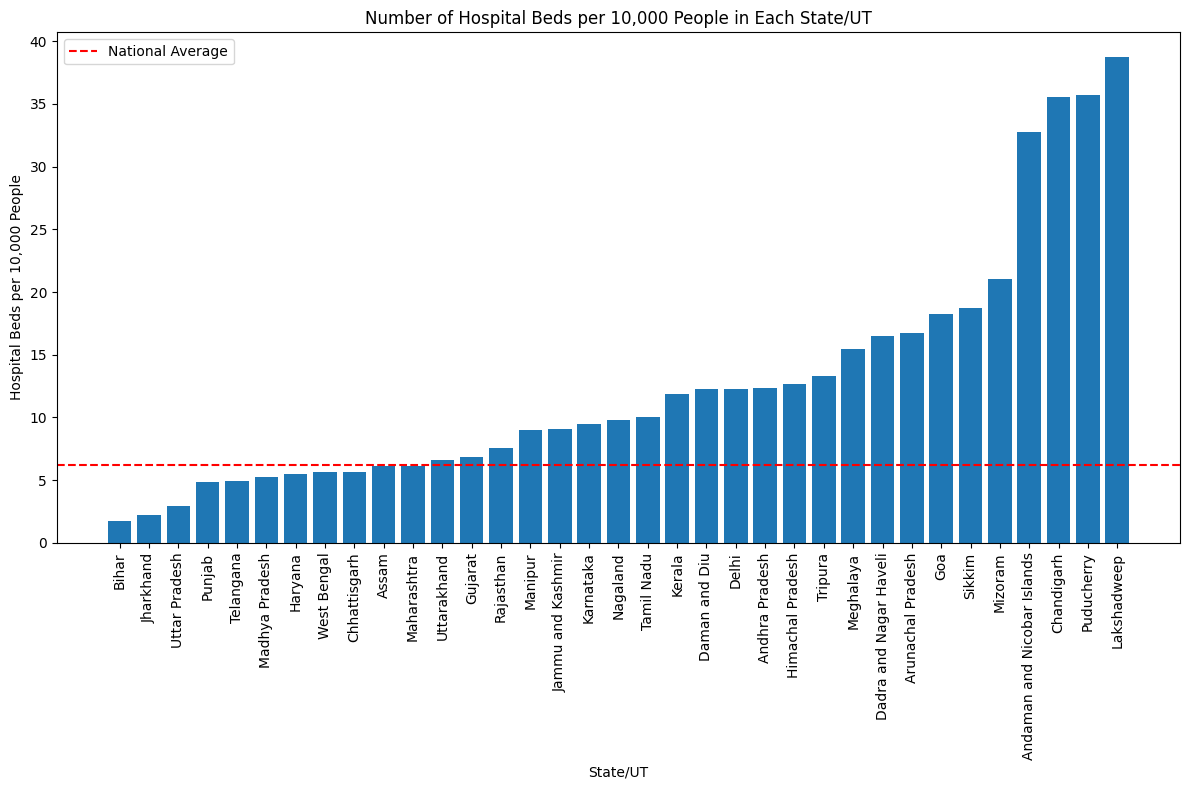

States/UTs with the least amount of beds for their population:
['Bihar', 'Jharkhand', 'Uttar Pradesh']


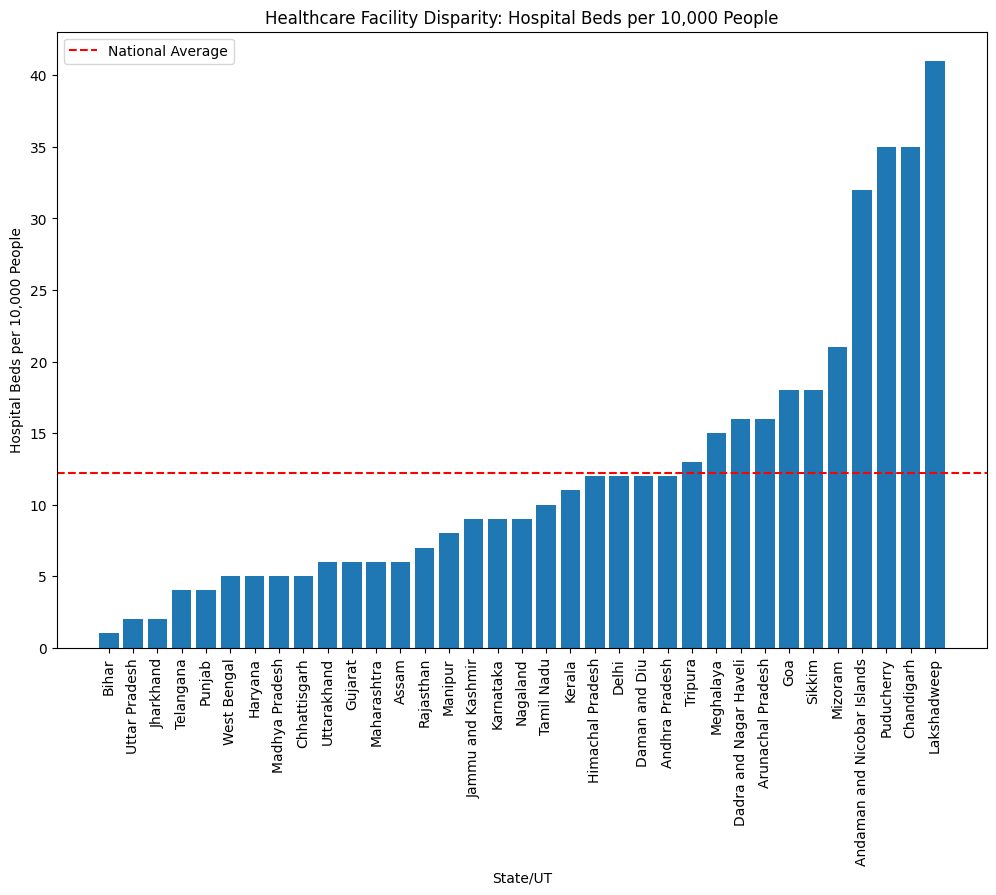

In [33]:

# Read the hospital data
hospital_data = pd.read_csv("Clean/hospital.csv")

merged_data = pd.merge(hospital_data, pop_by_state, on="State/UT")

merged_data['HospitalBeds'] = pd.to_numeric(merged_data['HospitalBeds'], errors='coerce')
merged_data['Population'] = pd.to_numeric(merged_data['Population'], errors='coerce')

merged_data['BedsPer10000'] = merged_data['HospitalBeds'] / (merged_data['Population'] / 10000)

merged_data_sorted = merged_data.sort_values('BedsPer10000')

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(merged_data_sorted['State/UT'], merged_data_sorted['BedsPer10000'])
plt.xlabel('State/UT')
plt.ylabel('Hospital Beds per 10,000 People')
plt.title('Number of Hospital Beds per 10,000 People in Each State/UT')

national_average = merged_data['HospitalBeds'].sum() / (merged_data['Population'].sum() / 10000)
plt.axhline(y=national_average, color='red', linestyle='--', label='National Average')

plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

least_beds_states = merged_data_sorted.head(3)['State/UT'].tolist()
print("States/UTs with the least amount of beds for their population:")
print(least_beds_states)




hospital_data = pd.read_csv("Clean/hospital.csv")
state_population_data = pop_by_state

# Merge hospital data and state population data based on the state or union territory column
merged_data = hospital_data.merge(state_population_data, on='State/UT')

merged_data['HospitalBeds'] = pd.to_numeric(merged_data['HospitalBeds'], errors='coerce')
merged_data['Population'] = pd.to_numeric(merged_data['Population'], errors='coerce')


# Calculate the number of hospital beds per 10,000 people
merged_data['Beds_per_10000'] = merged_data['HospitalBeds'] // (merged_data['Population'] // 10000)

# Sort the data in ascending order based on the hospital beds per 10,000 people
sorted_data = merged_data.sort_values('Beds_per_10000')

# Visualize the number of hospital beds per 10,000 people
plt.figure(figsize=(12, 8))
plt.bar(sorted_data['State/UT'], sorted_data['Beds_per_10000'])
plt.axhline(sorted_data['Beds_per_10000'].mean(), color='red', linestyle='--', label='National Average')
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Hospital Beds per 10,000 People')
plt.title('Healthcare Facility Disparity: Hospital Beds per 10,000 People')
plt.legend()
plt.show()


In [34]:

# Report three states/UTs with the least amount of beds for their population
least_beds_states = sorted_data.head(3)['State/UT']
print("States/UTs with the least amount of beds for their population:")
for state in least_beds_states:
    print(state)


sorted_data.to_csv('Clean/hospital.csv', index=False)
sorted_data

States/UTs with the least amount of beds for their population:
Bihar
Uttar Pradesh
Jharkhand


,State/UT,Number of Primary Health Centers,Community Health0 Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds,Population,Beds_per_10000
4,Bihar,2007,63,33,43,2146,17796,104099452.0,1.0
32,Uttar Pradesh,3277,671,NaN,174,4122,58310,199812341.0,2.0
15,Jharkhand,343,179,13,23,558,7404,32988134.0,2.0
30,Telangana,788,82,47,15,932,17358,35193978.0,4.0
26,Punjab,521,146,47,28,742,13527,27743338.0,4.0
34,West Bengal,1374,406,70,55,1905,51163,91276115.0,5.0
12,Haryana,500,131,24,28,683,13841,25351462.0,5.0
19,Madhya Pradesh,1420,324,72,51,1867,38140,72626809.0,5.0
6,Chhattisgarh,813,166,12,32,1023,14354,25545198.0,5.0
33,Uttarakhand,275,69,19,20,383,6660,10086292.0,6.0


Graph 1 calculates the average based on the sum of all hospital beds and total population

Graph 2 calculates it based on the mean of hospital beds per 10,000 people in the sorted data.

## <center>Government Hospitals Requirement Analysis
The Union of Doctors in its meeting passed a resolution that the government hospitals are lacking in numbers in many states, The government has taken notice of the resolution and has asked for a recommendation for the state where a new government hospital can be set up. 
Use the government hospital data (Data/government_hospitals.csv) to suggest which state the government should create a new hospital.


Problem Statement 13: (Multi-line header)
The header in (Data/government_hospitals.csv) is in 2 rows 

States/UTs	Rural hospitals	Urban hospitals	As on

No.	Beds	No.	Beds	


The headers are required to be edited for ease of future use as well as for the sake of uniformity. 

Import and update the data in a way that it has the following column names

	State/UT

	Rural_Government_Hospitals

	Rural_Government_Beds

	Urban_Government_Hospitals

	Urban_Government_Beds

	Last_Updated



In [35]:
govt_hosp=pd.read_csv("Data/government_hospitals.csv")
govt_hosp.head(3)


,States/UTs,Rural hospitals,Unnamed: 2,Urban hospitals,Unnamed: 4,As on
0,NaN,No.,Beds,No.,Beds,NaN
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017


In [36]:
govt_hosp = govt_hosp.rename(columns={'States/UTs': 'State/UT', 'Rural hospitals': 'Rural_Government_Hospitals', "Unnamed: 2":"Rural_Government_Beds","Urban hospitals":"Urban_Government_Hospitals","Unnamed: 4":"Urban_Government_Beds","As on":"Last_Updated"})
govt_hosp = govt_hosp.drop(0)

govt_hosp

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016
5,Chhattisgarh,169,5070,45,4342,01.01.2016
6,Goa*,17,1405,25,1608,31.12.2017
7,Gujarat,364,11715,122,20565,31.12.2016
8,Haryana*,609,6690,59,4550,31.12.2016
9,Himachal Pradesh*,705,5665,96,6734,31.12.2017
10,Jammu & Kashmir,56,7234,76,4417,30.12.2016


Problem Statement 14: (Data update and code reuse)
The ”Last_Updated” column contains a date that is in the format  DD.MM.YYYY but in the future, the date is required in a different format (YYYY-MM-DD)  update the date to the required format.
The State/UT names have some different formats compared to other census and housing data. Fix those issues using the function created earlier. If the function created earlier for all_hospitals cannot be used for government_hospital then edit the function so that it can be used for both.
Create a new file “government_hospital.csv” in the “Clean” folder and save all the government hospital data after the update.


In [37]:
govt_hosp["Last_Updated"] = pd.to_datetime(govt_hosp["Last_Updated"], format="%d.%m.%Y").dt.strftime("%Y-%m-%d")
govt_hosp

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
1,Andhra Pradesh,193,6480,65,16658,2017-01-01
2,Arunachal Pradesh*,208,2136,10,268,2017-12-31
3,Assam,1176,10944,50,6198,2017-12-31
4,Bihar,930,6083,103,5936,2016-12-31
5,Chhattisgarh,169,5070,45,4342,2016-01-01
6,Goa*,17,1405,25,1608,2017-12-31
7,Gujarat,364,11715,122,20565,2016-12-31
8,Haryana*,609,6690,59,4550,2016-12-31
9,Himachal Pradesh*,705,5665,96,6734,2017-12-31
10,Jammu & Kashmir,56,7234,76,4417,2016-12-30


In [38]:
def clean_state_name(state_name):
    state_name = state_name.replace('*', '')
    state_name = state_name.title()
    return state_name

# Clean and fix the State/UT names using the function
govt_hosp["State/UT"] = govt_hosp["State/UT"].apply(clean_state_name)
govt_hosp['State/UT'] = govt_hosp['State/UT'].replace('&', 'and', regex=True)

govt_hosp

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
1,Andhra Pradesh,193,6480,65,16658,2017-01-01
2,Arunachal Pradesh,208,2136,10,268,2017-12-31
3,Assam,1176,10944,50,6198,2017-12-31
4,Bihar,930,6083,103,5936,2016-12-31
5,Chhattisgarh,169,5070,45,4342,2016-01-01
6,Goa,17,1405,25,1608,2017-12-31
7,Gujarat,364,11715,122,20565,2016-12-31
8,Haryana,609,6690,59,4550,2016-12-31
9,Himachal Pradesh,705,5665,96,6734,2017-12-31
10,Jammu and Kashmir,56,7234,76,4417,2016-12-30


In [39]:
govt_hosp.to_csv("Clean/government_hospital.csv", index=False)
govt_hosp

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
1,Andhra Pradesh,193,6480,65,16658,2017-01-01
2,Arunachal Pradesh,208,2136,10,268,2017-12-31
3,Assam,1176,10944,50,6198,2017-12-31
4,Bihar,930,6083,103,5936,2016-12-31
5,Chhattisgarh,169,5070,45,4342,2016-01-01
6,Goa,17,1405,25,1608,2017-12-31
7,Gujarat,364,11715,122,20565,2016-12-31
8,Haryana,609,6690,59,4550,2016-12-31
9,Himachal Pradesh,705,5665,96,6734,2017-12-31
10,Jammu and Kashmir,56,7234,76,4417,2016-12-30


Problem Statement 15: (Government healthcare facility disparity)
Since the resources are limited, it is required to identify the region which lacks the healthcare facility the most for creating new government hospitals.
An idea was suggested* that first the three States/UTs which have the least amount of beds (in all hospitals government and private) for their population is identified. Among those three the state which has the least number of government hospitals can be recommended for setting up a new government hospital.


In [40]:
least_beds_states = merged_data_sorted.head(3)['State/UT'].tolist()
print("States/UTs with the least amount of beds for their population:")
print(least_beds_states)


least_beds_states_df = hospital_data[hospital_data['State/UT'].isin(least_beds_states)].copy()
least_beds_states_df


States/UTs with the least amount of beds for their population:
['Bihar', 'Jharkhand', 'Uttar Pradesh']


,State/UT,Number of Primary Health Centers,Community Health0 Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
4,Bihar,2007,63,33,43,2146,17796
15,Jharkhand,343,179,13,23,558,7404
33,Uttar Pradesh,3277,671,NaN,174,4122,58310


In [41]:
least_beds_states_df["Expected_beds"]=3*census_data["Population"]//1000
least_beds_states_df

,State/UT,Number of Primary Health Centers,Community Health0 Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds,Expected_beds
4,Bihar,2007,63,33,43,2146,17796,1430.0
15,Jharkhand,343,179,13,23,558,7404,1229.0
33,Uttar Pradesh,3277,671,NaN,174,4122,58310,252.0


In [42]:
beds_info=least_beds_states_df[["State/UT","HospitalBeds","Expected_beds"]]
beds_info_2=merged_data[["State/UT","Beds_per_10000","Population"]]
joined_data = beds_info.merge(beds_info_2, on="State/UT")
joined_data

,State/UT,HospitalBeds,Expected_beds,Beds_per_10000,Population
0,Bihar,17796,1430.0,1.0,104099452.0
1,Jharkhand,7404,1229.0,2.0,32988134.0
2,Uttar Pradesh,58310,252.0,2.0,199812341.0


## <center>World Health Organization Standards

    According to WHO standards, a minimum of 3 beds per 1000 people is required. Monica wants to analyse whether different regions in India as well as the nation as a whole are up to that standard. If not, how many facilities are required to fill the gap?


Problem Statement 16: (Gap in number of beds)
Visually represent the difference between the expected number of hospital beds and the available number of hospital beds in each State/UT, as well as at the national level (if any).


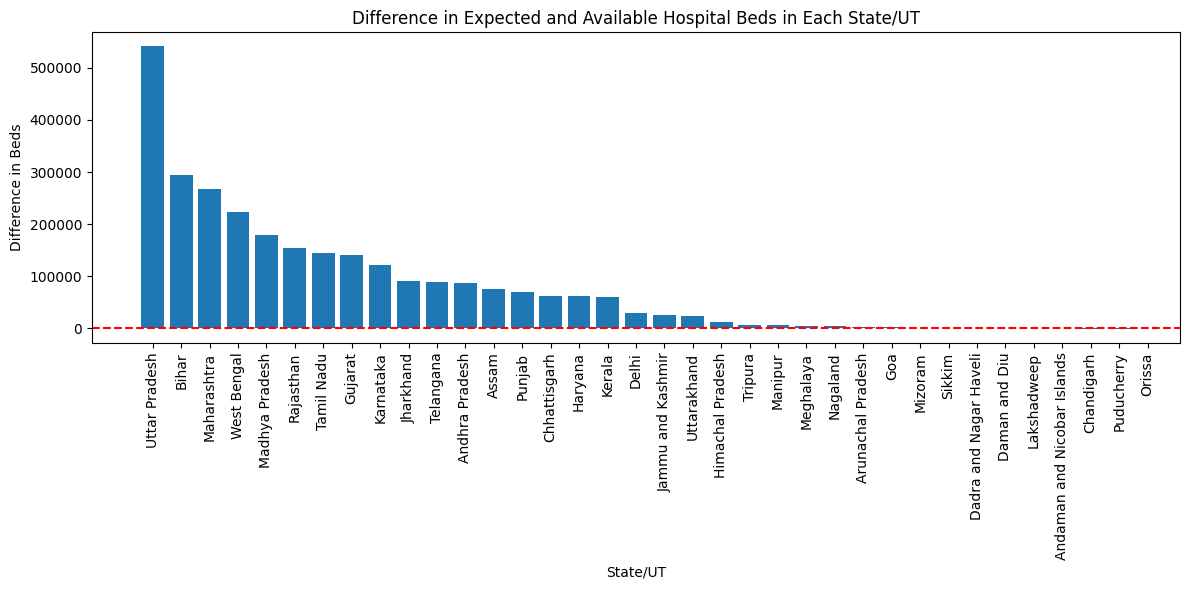

Difference in Expected and Available Hospital Beds at the National Level: 2904496.8620000007


State/UT
Uttar Pradesh                  541127.023
Bihar                          294502.356
Maharashtra                    268124.999
West Bengal                    222665.345
Madhya Pradesh                 179740.427
Rajasthan                      153801.311
Tamil Nadu                     143825.090
Gujarat                        140190.076
Karnataka                      121411.822
Jharkhand                       91560.402
Telangana                       88223.934
Andhra Pradesh                  87361.397
Assam                           74501.728
Punjab                          69703.014
Chhattisgarh                    62281.594
Haryana                         62213.386
Kerala                          60707.183
Delhi                           29791.823
Jammu and Kashmir               26281.906
Uttarakhand                     23598.876
Himachal Pradesh                11887.806
Tripura                          6126.751
Manipur                          6005.382
Meghalaya                

In [43]:


# Read the hospital data
hospital_data = pd.read_csv("Clean/hospital.csv")

# Convert 'HospitalBeds' column to numeric
hospital_data['HospitalBeds'] = pd.to_numeric(hospital_data['HospitalBeds'], errors='coerce')

# Calculate the expected number of hospital beds per 1000 people (WHO standard)
expected_beds_per_1000 = 3

# Calculate the expected number of hospital beds for each State/UT
expected_beds = (pop_by_state['Population'] / 1000) * expected_beds_per_1000

# Calculate the available number of hospital beds for each State/UT
available_beds = hospital_data.groupby('State/UT')['HospitalBeds'].sum()

# Calculate the difference between expected and available beds for each State/UT
beds_difference = expected_beds - available_beds
beds_difference=beds_difference.sort_values(ascending=False)
beds_difference.fillna(0)
# Calculate the difference between expected and available beds at the national level
national_beds_difference = expected_beds.sum() - available_beds.sum()

# Plot the difference in beds for each State/UT
plt.figure(figsize=(12, 6))
plt.bar(beds_difference.index, beds_difference.values)
plt.xlabel('State/UT')
plt.ylabel('Difference in Beds')
plt.title('Difference in Expected and Available Hospital Beds in Each State/UT')
plt.axhline(y=0, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Print the difference in beds at the national level
print("Difference in Expected and Available Hospital Beds at the National Level:", national_beds_difference)
beds_difference

Problem Statement 17: (Hospitals required to meet the standards)

In a hypothetical situation if the government wishes to fill the gap between the available facility and the WHO standards all by itself how many government hospitals may be required in each state or union territory as well as at the national level?
Find the average number of beds in a government hospital. Divide it by the gap in the number of beds to reach the standards in the region, and round the number to the nearest integer to find the value.
Represent the findings visually.


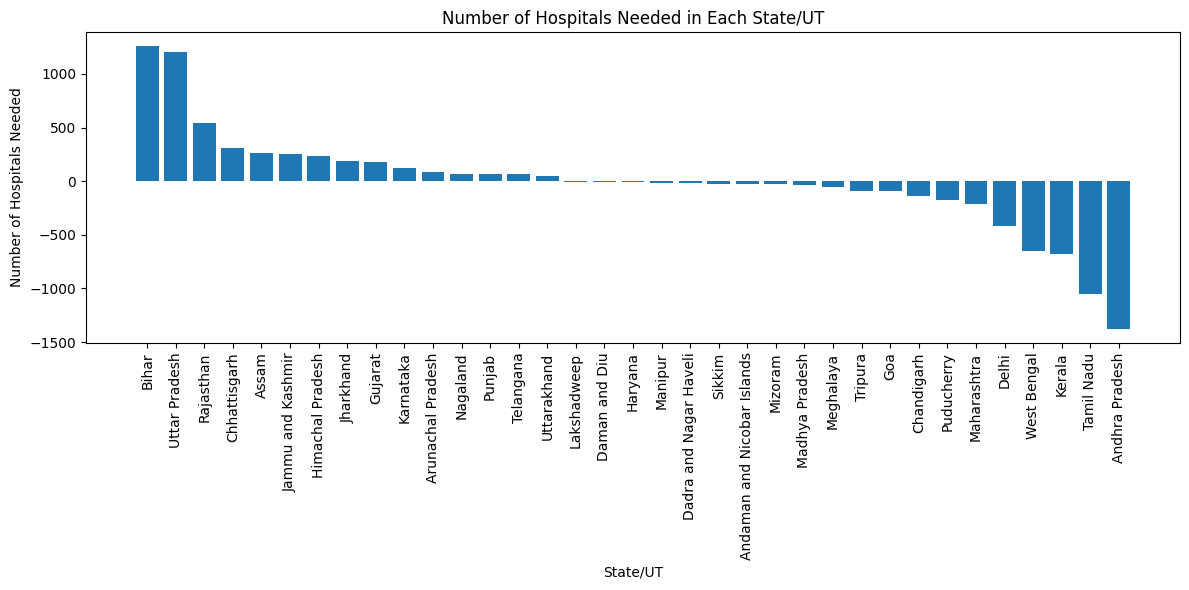

,State/UT,Number of Primary Health Centers,Community Health0 Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds,Population,Beds_per_10000,Average_beds,Gap_in_num_beds,Hospital_needed_to_build
0,Bihar,2007,63,33.0,43,2146,17796,104099452.0,1.0,42920,25124,1256
1,Uttar Pradesh,3277,671,NaN,174,4122,58310,199812341.0,2.0,82440,24130,1206
13,Rajasthan,2463,579,64.0,33,3139,51844,68548437.0,7.0,62780,10936,546
8,Chhattisgarh,813,166,12.0,32,1023,14354,25545198.0,5.0,20460,6106,305
12,Assam,1007,166,14.0,33,1220,19115,31205576.0,6.0,24400,5285,264
15,Jammu and Kashmir,702,87,NaN,29,818,11342,12541302.0,9.0,16360,5018,250
20,Himachal Pradesh,516,79,61.0,15,671,8706,6864602.0,12.0,13420,4714,235
2,Jharkhand,343,179,13.0,23,558,7404,32988134.0,2.0,11160,3756,187
10,Gujarat,1770,385,44.0,37,2236,41129,60439692.0,6.0,44720,3591,179
16,Karnataka,2547,207,147.0,42,2943,56333,59248274.0,9.0,58860,2527,126


In [44]:
govt_hosp=pd.read_csv("Clean/government_hospital.csv")
govt_hosp
hospital_data=pd.read_csv("Clean/hospital.csv")
hospital_data


total_beds=hospital_data["HospitalBeds"].sum()
total_hospitals=hospital_data["Hospitals"].sum()

avrg_beds=total_beds//total_hospitals
avrg_beds

hospital_data["Average_beds"]=avrg_beds*hospital_data["Hospitals"]


hospital_data["Gap_in_num_beds"]=hospital_data["Average_beds"]-hospital_data["HospitalBeds"]

hospital_data["Hospital_needed_to_build"]=hospital_data["Gap_in_num_beds"]//20

hospital_data=hospital_data.sort_values("Gap_in_num_beds",ascending=False)



plt.figure(figsize=(12, 6))
plt.bar(hospital_data['State/UT'], hospital_data['Hospital_needed_to_build'])
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Number of Hospitals Needed')
plt.title('Number of Hospitals Needed in Each State/UT')
plt.tight_layout()
plt.show()
hospital_data.head(15)


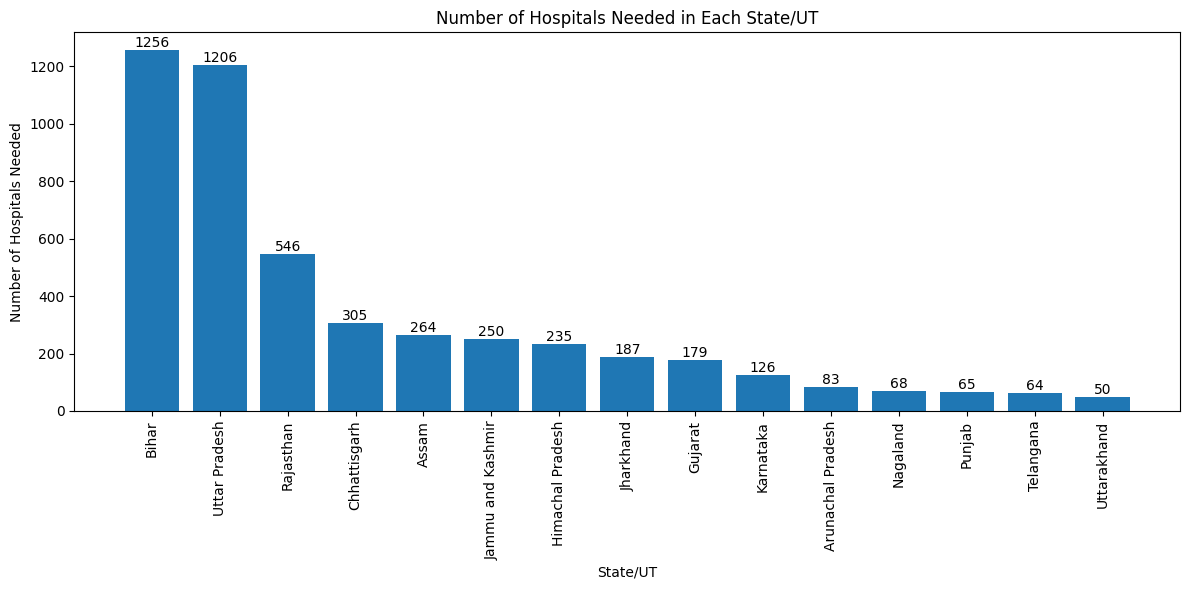

,State/UT,Number of Primary Health Centers,Community Health0 Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds,Population,Beds_per_10000,Average_beds,Gap_in_num_beds,Hospital_needed_to_build
0,Bihar,2007,63,33.0,43,2146,17796,104099452.0,1.0,42920,25124,1256
1,Uttar Pradesh,3277,671,NaN,174,4122,58310,199812341.0,2.0,82440,24130,1206
13,Rajasthan,2463,579,64.0,33,3139,51844,68548437.0,7.0,62780,10936,546
8,Chhattisgarh,813,166,12.0,32,1023,14354,25545198.0,5.0,20460,6106,305
12,Assam,1007,166,14.0,33,1220,19115,31205576.0,6.0,24400,5285,264
15,Jammu and Kashmir,702,87,NaN,29,818,11342,12541302.0,9.0,16360,5018,250
20,Himachal Pradesh,516,79,61.0,15,671,8706,6864602.0,12.0,13420,4714,235
2,Jharkhand,343,179,13.0,23,558,7404,32988134.0,2.0,11160,3756,187
10,Gujarat,1770,385,44.0,37,2236,41129,60439692.0,6.0,44720,3591,179
16,Karnataka,2547,207,147.0,42,2943,56333,59248274.0,9.0,58860,2527,126


In [45]:
hospital_data=hospital_data.head(15)


plt.figure(figsize=(12, 6))
plt.bar(hospital_data['State/UT'], hospital_data['Hospital_needed_to_build'])
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Number of Hospitals Needed')
plt.title('Number of Hospitals Needed in Each State/UT')
plt.tight_layout()
for i, value in enumerate(hospital_data['Hospital_needed_to_build']):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()
hospital_data.head(15)